CS21BTECH11008--> ADARSH SURESH BHENDE 

CS21BTECH11023-->JARUPULA SAI KUMAR


BDA:ASSIGNMENT-1

importing required liabraries


In [7]:
import numpy as np
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt 

Given Pump data loading

In [8]:
x = np.array([5, 1, 5, 14, 3, 19, 1, 1, 4, 22])
t = np.array([94.3, 15.7, 62.9, 126, 5.24, 31.4, 1.05, 1.05, 2.1, 10.5])
#Number of Pumps
N = len(x)
print("OK")

OK


Priors for Gamma distribution parameters

Defining the Hierarchical Model

In [13]:
with pm.Model() as model:
    # this are the corrected alpha and beta
    alpha = pm.Exponential("alpha", 1)
    beta = pm.Gamma("beta", 0.1, 1)

  # Latent variables
    # theta = pm.Gamma("theta", alpha=alpha, beta=beta, shape=len(failures))


    # Priors for the rate parameters lambda
    lambda_ = pm.Gamma('lambda_', alpha=alpha, beta=beta, shape=N)
    
    #Poisson distribution (Likelyhood)
    failures = pm.Poisson('failures', mu=lambda_ * t, observed=x)
    
    # Sample from the posterior distribution
    trace = pm.sample(1000, tune=1000, cores=1,return_inferencedata=False)  # can be adjusted as per the requirement
    approx = pm.fit(1000, method='advi')  # VI approximation

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [lambda_, beta, alpha]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 7 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


Finished [100%]: Average Loss = 2,447.3


Statastics MCMC

In [26]:

with pm.Model() as model:
   summary_MCMC = pm.summary(trace)
   print(summary_MCMC)

             mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha       0.703  0.264   0.229    1.167      0.007    0.005    1450.0   
beta        0.933  0.529   0.141    1.914      0.014    0.011    1729.0   
lambda_[0]  0.061  0.025   0.017    0.106      0.001    0.000    2478.0   
lambda_[1]  0.103  0.082   0.001    0.254      0.001    0.001    2997.0   
lambda_[2]  0.088  0.037   0.027    0.159      0.001    0.001    2076.0   
lambda_[3]  0.116  0.029   0.066    0.174      0.001    0.000    3000.0   
lambda_[4]  0.605  0.318   0.090    1.183      0.006    0.005    2635.0   
lambda_[5]  0.605  0.136   0.365    0.859      0.003    0.002    2575.0   
lambda_[6]  0.905  0.768   0.010    2.278      0.016    0.013    2205.0   
lambda_[7]  0.881  0.703   0.002    2.209      0.012    0.010    2682.0   
lambda_[8]  1.622  0.798   0.373    3.023      0.015    0.011    2396.0   
lambda_[9]  1.987  0.416   1.201    2.716      0.008    0.005    2778.0   

            ess_tail  r_

Statastic VI

In [27]:
# Extract summary statistics from the approximate posterior (VI)
# summary_VI = approx.summary()
# print("VI Summary:")
# print(summary_VI)

# Convert VI result to trace

with pm.Model() as model:
 trace_VI = approx.sample(1000)

 # Extract summary statistics from the trace
 summary_trace_VI = pm.summary(trace_VI)
 print("VI Trace Summary:")
 print(summary_trace_VI)

arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


VI Trace Summary:
             mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha       0.873  0.588   0.130    1.920      0.020    0.014     914.0   
beta        0.120  0.083   0.018    0.265      0.003    0.002     947.0   
lambda_[0]  6.510  4.711   0.763   13.976      0.150    0.106     949.0   
lambda_[1]  6.624  4.484   1.306   14.175      0.141    0.100    1004.0   
lambda_[2]  6.653  4.522   0.973   14.772      0.149    0.107     942.0   
lambda_[3]  6.546  4.644   1.218   15.217      0.147    0.112     982.0   
lambda_[4]  6.553  4.457   0.862   13.828      0.147    0.104     929.0   
lambda_[5]  6.671  4.614   0.799   14.586      0.147    0.105    1057.0   
lambda_[6]  6.786  4.998   0.826   14.774      0.153    0.110    1043.0   
lambda_[7]  6.802  5.214   0.994   15.500      0.173    0.131     961.0   
lambda_[8]  6.751  5.137   1.182   15.899      0.163    0.116     937.0   
lambda_[9]  6.487  4.268   0.898   14.163      0.143    0.101     901.0   

      

Testing part

In [28]:
lambda_samples = trace['lambda_']

#Prediction Making 
predicted_failures = np.mean(lambda_samples, axis=0) * t

# Calculating Mean Absolute Error (MAE)
actual_failures = np.array([5, 1, 5, 14, 3, 19, 1, 1, 4, 22])  # Actual ailures as per the data
mae = np.mean(np.abs(predicted_failures - actual_failures))
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.45285610110250174


In [29]:
lambda_samples_VI = trace_VI['lambda_']
predicted_failures_VI = np.mean(lambda_samples_VI, axis=0) * t

# Calculating Mean Absolute Error (MAE) for VI
mae_VI = np.mean(np.abs(predicted_failures_VI - actual_failures))
print("Mean Absolute Error (MAE) for VI:", mae_VI)

Mean Absolute Error (MAE) for VI: 222.65267090130737


Posterior Distribution Plots

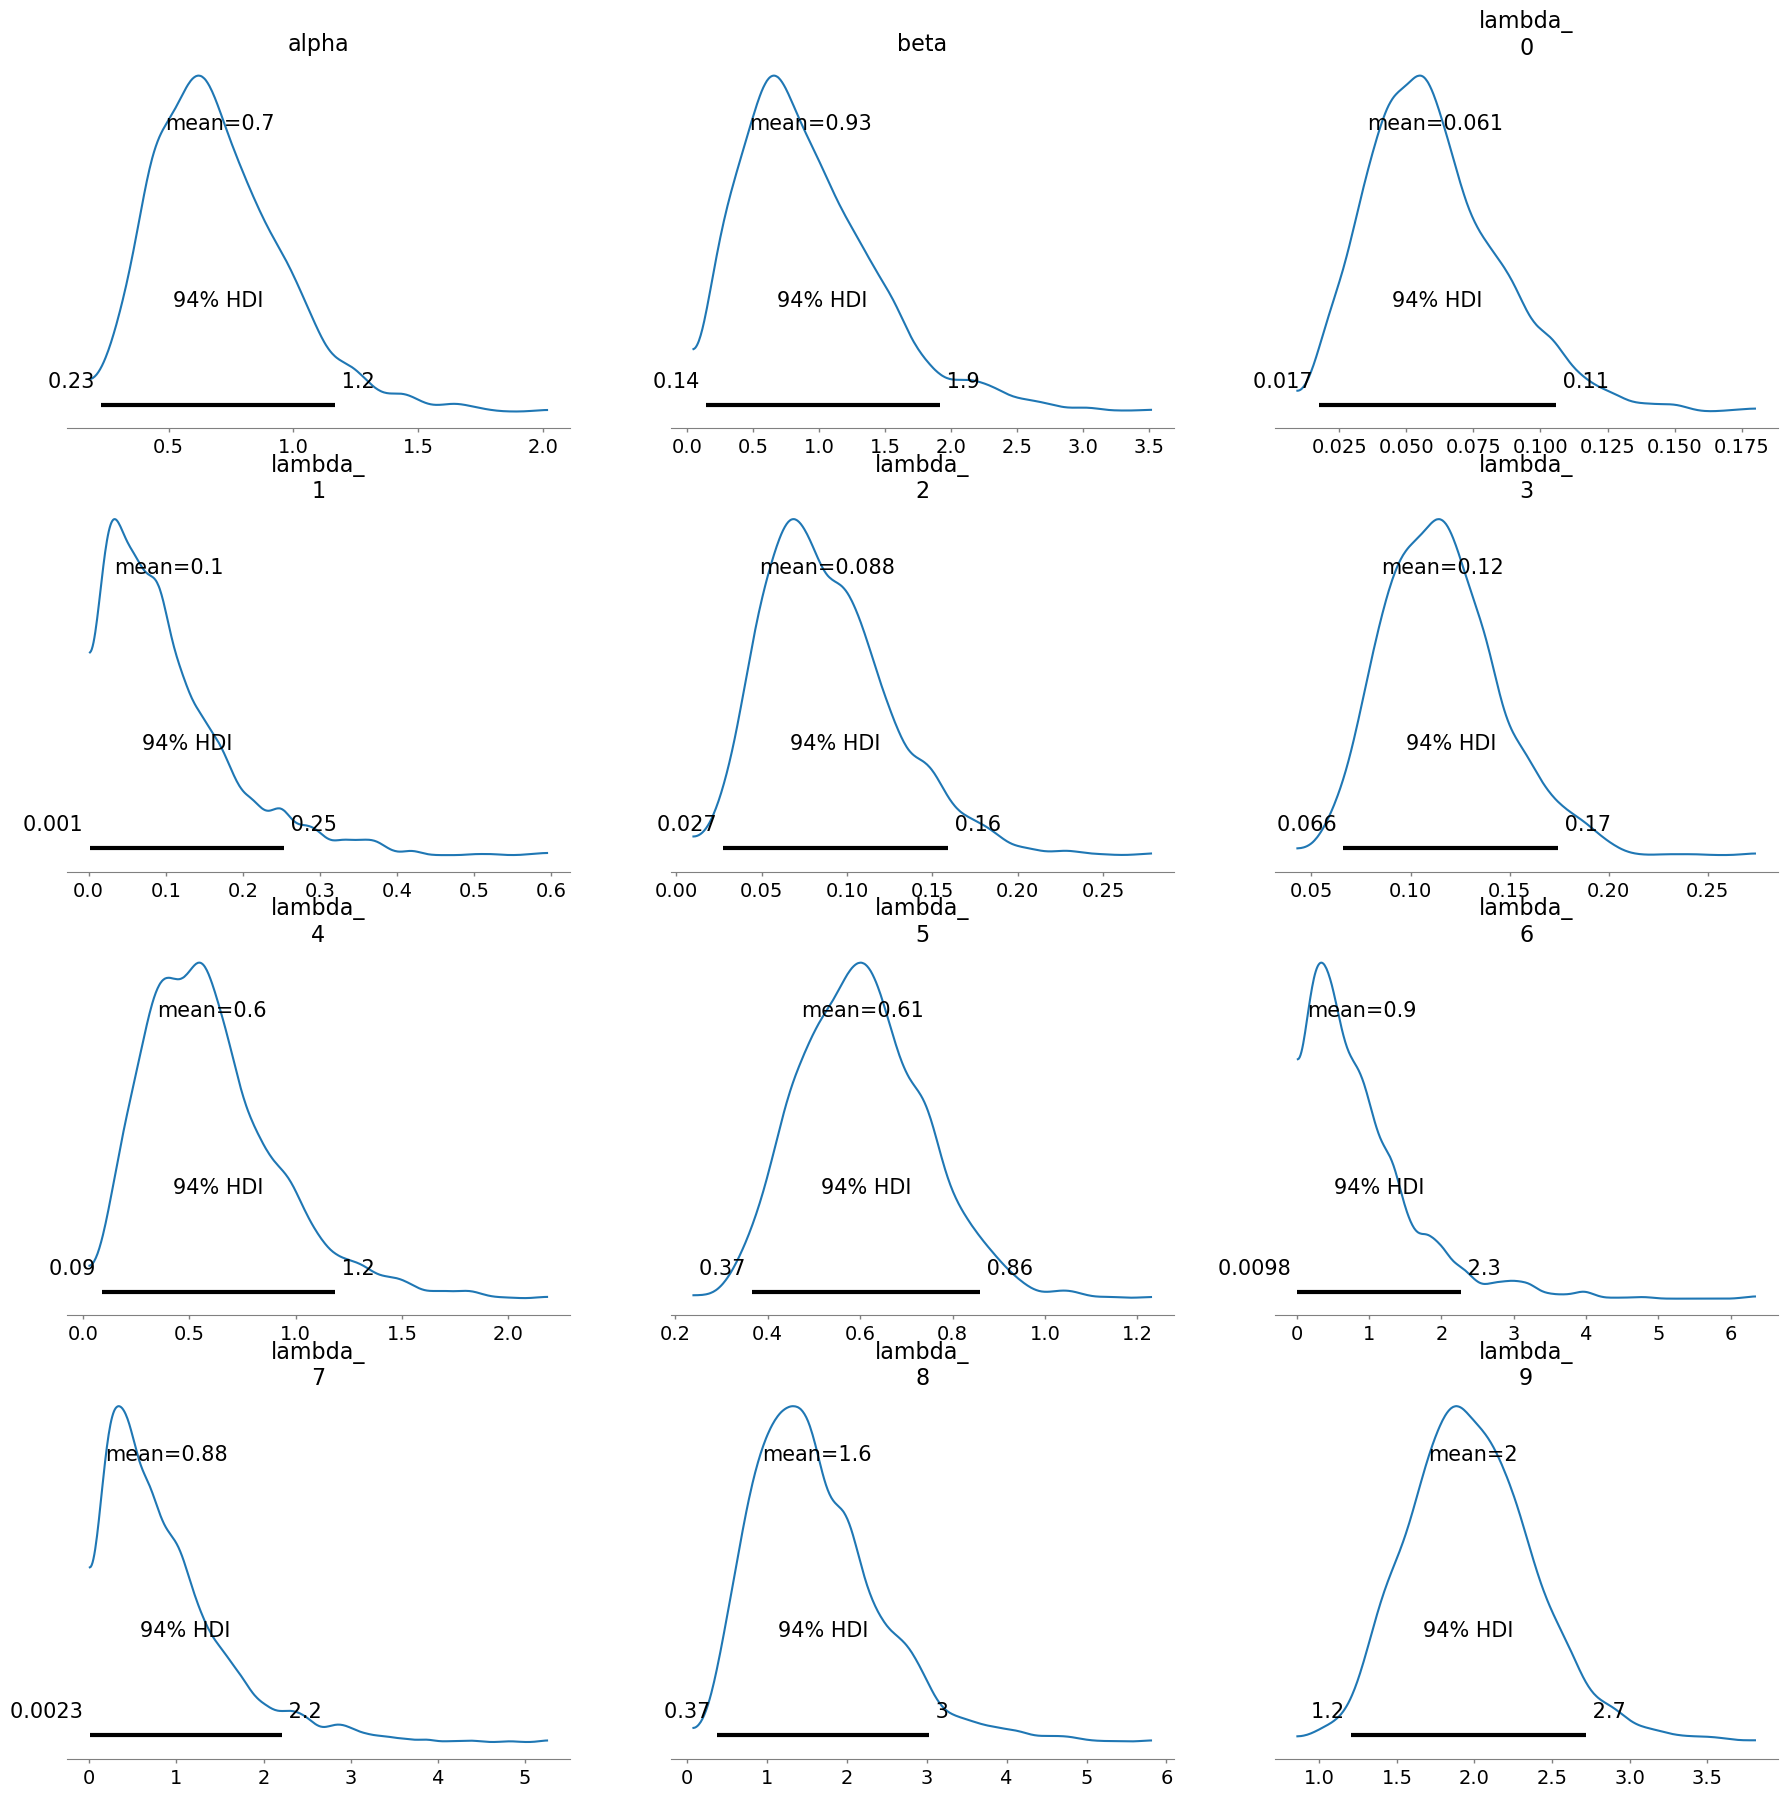

In [30]:
with pm.Model() as model:
 az.plot_posterior(trace)
 plt.show()

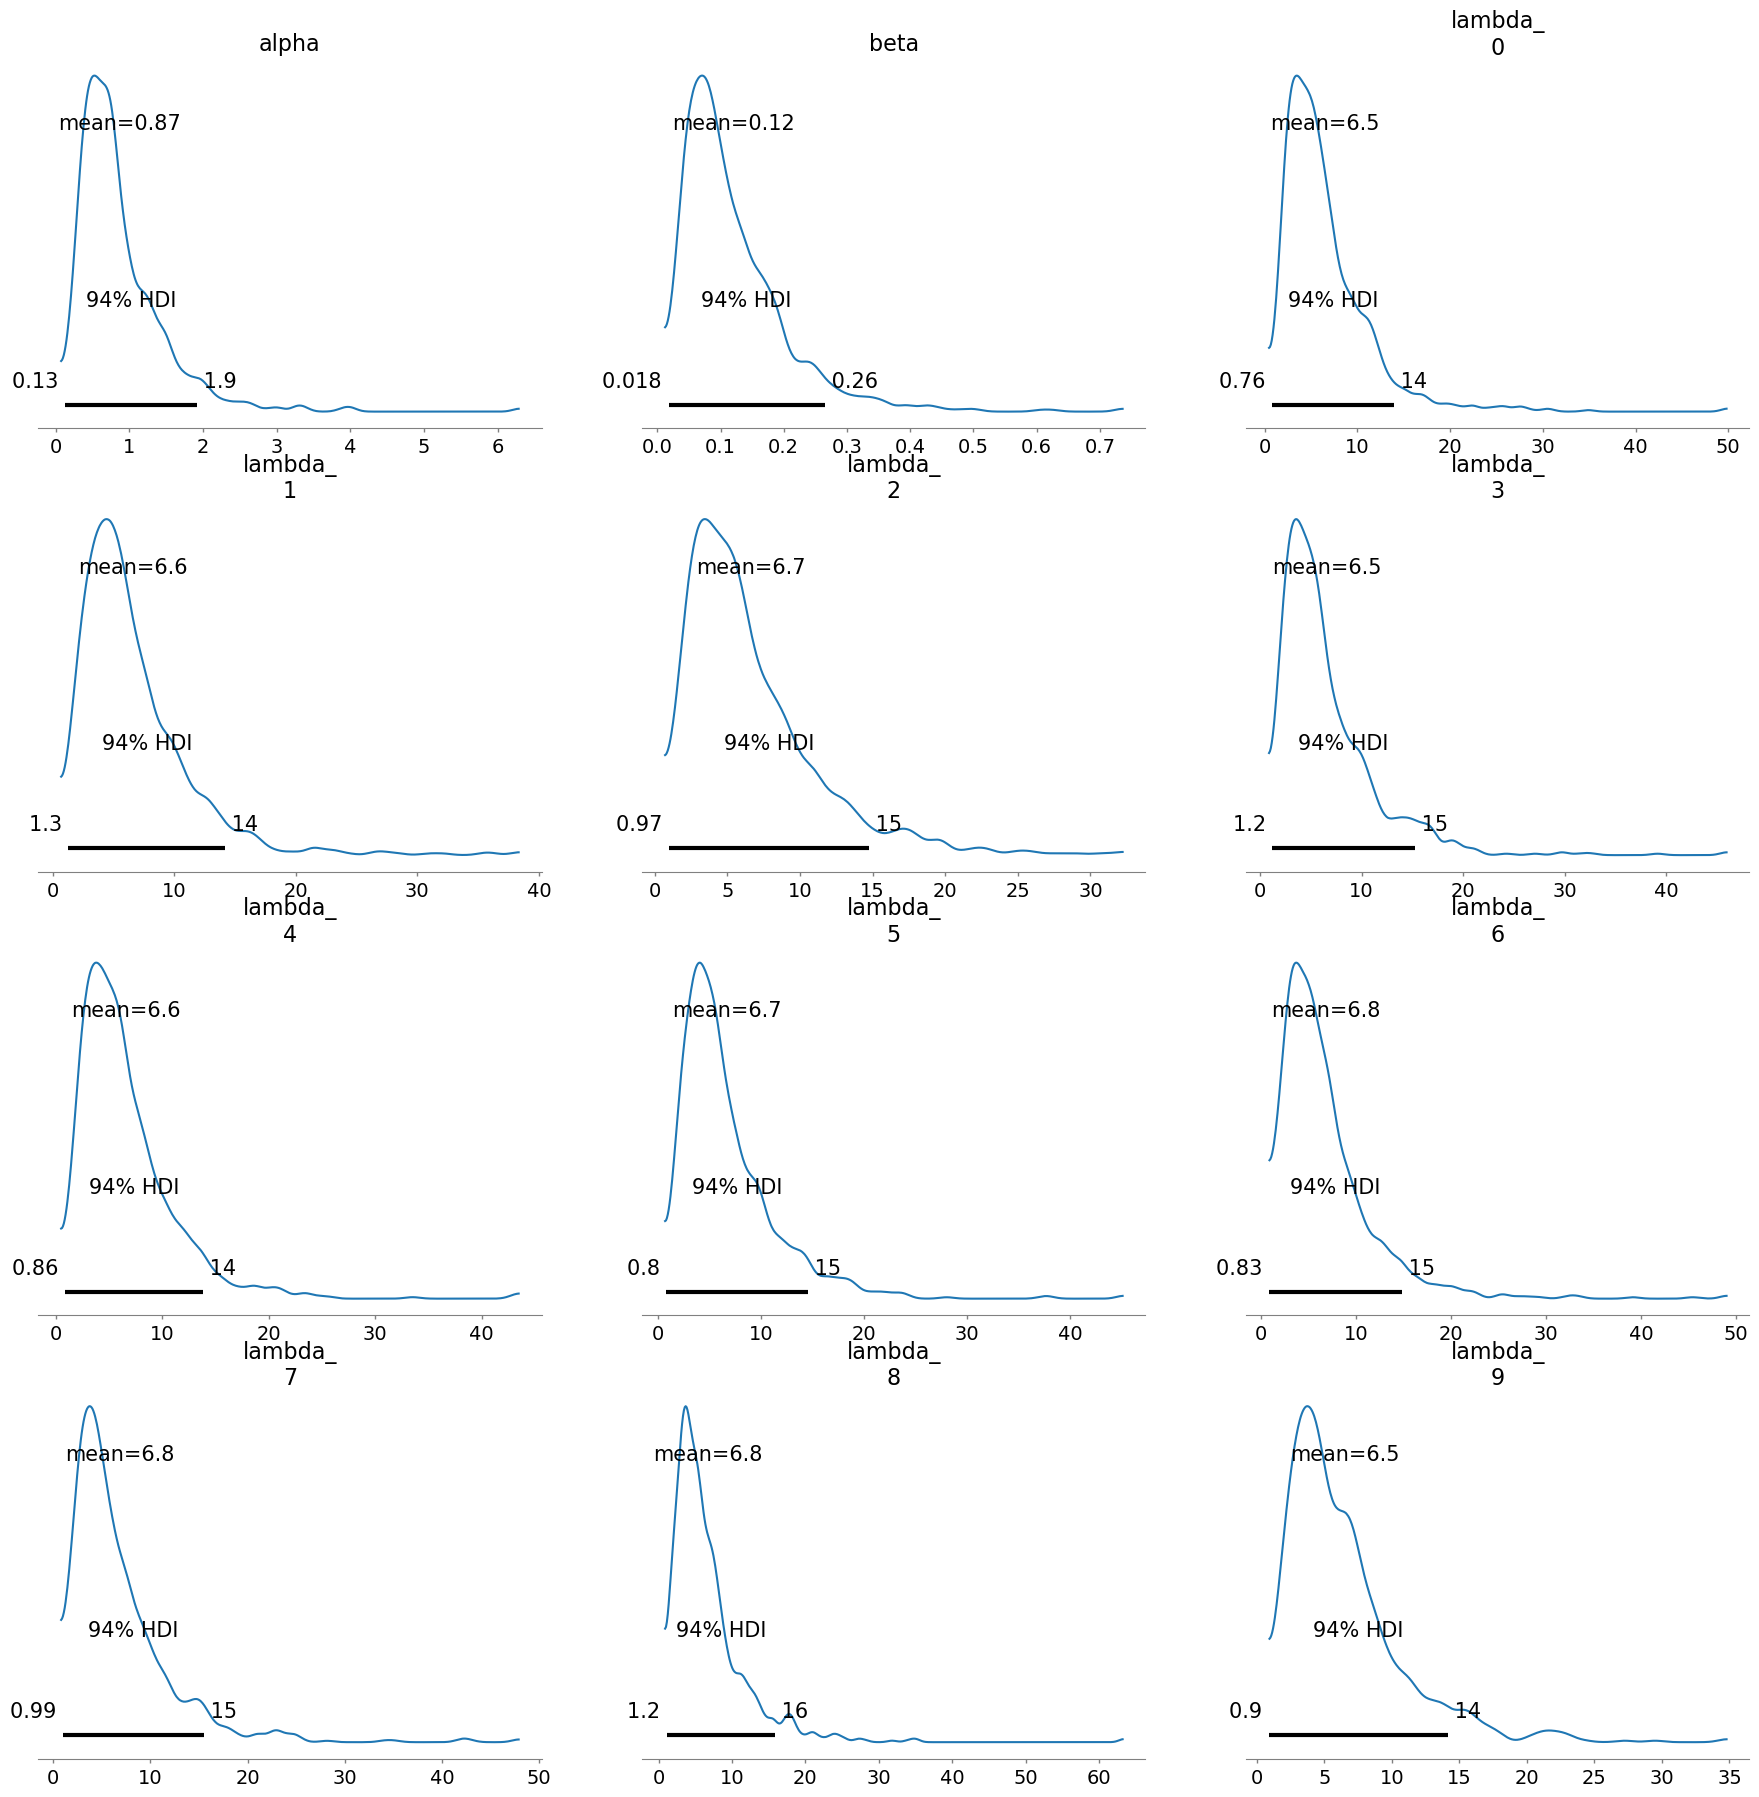

In [31]:
with pm.Model() as model:
 az.plot_posterior(trace_VI)
 plt.show()